# GVradar V1.5 #

### Global Precipitation Measurement (GPM) Ground Validation (GV) radar processing software (GVradar).

* Python based Dual Pol Quality Control (DPQC), utilizing the Python Atmospheric Radiation Measurement (ARM) Radar Toolkit (Py-ART) and CSU Radar Tools.
* Precipitation product generation from Dual Pol, utilizing the Python Atmospheric Radiation Measurement (ARM) Radar Toolkit (Py-ART) and CSU Radar Tools.
* Developed by the NASA GPM-GV group
* V0.5 - 12/06/2021 - update by Jason Pippitt NASA/GSFC/SSAI
* V1.0 - 11/01/2022 - update by Jason Pippitt NASA/GSFC/SSAI
* V1.5 - 02/02/2024 - update by Jason Pippitt NASA/GSFC/SSAI

### Notebook is for learning purposes.  Operationally, GVradar will be run from the command line, see README.

### Install GVradar as shown in the README, now you can import GVradar and declare your input file.

In [1]:
from gvradar import GVradar
import requests, os, shutil

# Read in RAW NPOL file
response = requests.get('https://pmm-gv.gsfc.nasa.gov/pub/NPOL/Newark/2022/1127/ppi/np1221127195516.RAW2LD4.gz')
open("./np1221127195516.RAW2LD4.gz", "wb").write(response.content)

file = "./np1221127195516.RAW2LD4.gz"


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Done.



### First, we will run QC.  There are multiple options that allow the user to set threshold, image, output, and sounding prefrences.

In [2]:
kwargs = {}

# Set DBZ threshold, values less than thresh will be masked.
kwargs.update({'do_dbz': True, 'dbz_thresh': 5.0})

# Set RHOhv threshold, values less than thresh will be masked.
kwargs.update({'do_rh': True, 'rh_thresh': 0.72})

# Set ZDR threshold, values outside of range will be masked.
kwargs.update({'do_zdr': True, 'dr_min': -6.0, 'dr_max': 4.0})

# Set KDP threshold, values outside of range will be masked.
kwargs.update({'do_kdp': True, 'kdp_min': -2.0, 'kdp_max': 7.0})

# Set SQ threshold, values less than thresh will be masked.
kwargs.update({'do_sq': True, 'sq_thresh': 0.55})

# Get SD field, retrives CSU SD if get_GV_SD set to False.
kwargs.update({'get_GV_SD':  False, 'SD_window': 15})

# Apply SD thresholds
# If sd_thresh_max = 0 values greater than sd_thresh will be masked.
# If sd_thresh_max > sd_thresh values within range will be masked.
# Limit what height to apply threshold.
kwargs.update({'do_sd': True, 'sd_thresh': 18.0, 'sd_thresh_max': 0, 'sd_height': 4.4})

# Set PH threshold, values less than thresh will be masked.
kwargs.update({'do_ph': False, 'ph_thresh': 80.0})

# Unfold phidp and set max_phidp_diff
kwargs.update({'unfold_phidp': True, 'max_phidp_diff': 360})

# Choose if you would like to dealias_the velocity field.
kwargs.update({'dealias_velocity': True})

# Apply SW mask
kwargs.update({'do_sw_mask': True})

# Apply an AP filter, when DBZ is less then ap_dbz and ZDR is greater than ap_zdr, data will be masked.
kwargs.update({'do_ap': True, 'ap_dbz': 45, 'ap_zdr': 3})

# Apply CSU insect or despeckle filters.
kwargs.update({'do_insect': False, 'do_despeckle': True})

# Apply pyART despeckle instead of CSU, and set speck size.
kwargs.update({'pyart_speck': True, 'speck_size': 10})

# Apply sector filters, Dual Pol thresholds can be applied to an user defined sector if needed.
# Cone of silence filter, data within area will be masked.
kwargs.update({'do_cos': False, 'coshmin': 0, 'coshmax': None, 'cosrmin': 0, 'cosrmax': 35,
               'cosazmin': 0, 'cosazmax': 360, 'coselmin': 0, 'coselmax': 20.0})

# Sector filter to masked all data, no thresholds needed.
kwargs.update({'do_sector': False, 'sechmin': 0, 'sechmax': None, 'secrmin': 0, 'secrmax': 150,
               'secazmin': 160, 'secazmax': 165, 'secelmin': 0, 'secelmax': 20.0})

# Sector filter with RHOhv threshold, data in sector with values less than rh_sec will be masked.
kwargs.update({'do_rh_sector': False, 'rhhmin': 0, 'rhhmax': None, 'rhrmin': 0, 'rhrmax': 50, 
               'rhazmin': 0, 'rhazmax': 360, 'rhelmin': 0, 'rhelmax': 20.0, 'rh_sec': 0.92})

# Sector filter with SD threshold, data in sector with values less than sd_sec will be masked.
kwargs.update({'do_sd_sector': False, 'sdhmin': 0, 'sdhmax': None, 'sdrmin': 0, 'sdrmax': 75, 
               'sdazmin': 0, 'sdazmax': 360, 'sdelmin': 0, 'sdelmax': 20.0, 'sd_sec': 8.0})

# Sector filter with PH threshold, data in sector with values less than ph_sec will be masked.
kwargs.update({'do_ph_sector': False, 'phhmin': 0, 'phhmax': None, 'phrmin': 0, 'phrmax': 150, 
               'phazmin': 160, 'phazmax': 165, 'phelmin': 0, 'phelmax': 20.0, 'ph_sec': 80.0})

# Sector filter with SW threshold, data in sector with values less than sw_sec will be masked.
kwargs.update({'do_sw_sector': False, 'swhmin': 0, 'swhmax': None, 'swrmin': 0, 'swrmax': 150, 
               'swazmin': 160, 'swazmax': 165, 'swelmin': 0, 'swelmax': 20.0, 'sw_sec': 4.0})

# Apply calibration corrections if needed, both are subtracted.
kwargs.update({'apply_cal': False, 'ref_cal': 0.0, 'zdr_cal': 0.0})

# Grab calibration numbers from cal txt file.
kwargs.update({'get_cal_file': False, 'cal_dir': './cal_files/'})

## There are two options for applying QC thresholds.

# Apply QC thresholds based on height of the radar beam (km).
# If True QC will be applied below qc_height.
kwargs.update({'use_qc_height': True, 'qc_height': 3.9})

# Apply QC based on the height of the freezing level.
# If True, QC will only be applied below freeing level.
kwargs.update({'use_sounding': False, 'sounding_type': 'ruc_archive',
               'sounding_dir': './sounding/'})

# Output CF file, fields to output, and output directory.
kwargs.update({'output_cf': False,
               'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'SD'],
               'cf_dir': './cf'})

# Output grid file, fields to output, and output directory.
kwargs.update({'output_grid': False,
               'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'SD'],
               'grid_dir': './nc/'})

# Select plot limits, plot type (single or multiplot), and fields to plot.
kwargs.update({'plot_raw_images': False, 'plot_images': True, 'max_range': 150, 'max_height': 15, 
               'sweeps_to_plot': [0], 'plot_single': False, 'plot_multi': True,
               'fields_to_plot': ['DZ', 'CZ', 'DR', 'KD', 'RH', 'VR']})

# Select fast plots (No Geography), mask values outside colorbar range,
# Add NASA and GPM logos to plot.  Set png to True to save plots in plot_dir.
kwargs.update({'plot_fast': False, 'mask_outside': False, 'add_logos': True,
               'png': False, 'plot_dir': './plots/'})

### Now we can run QC.


QC parameters:    

{'site': 'NPOL', 'scan_type': 'PPI', 'month': '11', 'day': '27', 'year': '2022', 'hh': '19', 'mm': '55', 'ss': '16', 'ref_field_name': 'CZ', 'phi_field_name': 'PH', 'zdr_field_name': 'DR', 'radar_band': 'S', 'do_dbz': True, 'dbz_thresh': 5.0, 'do_rh': True, 'rh_thresh': 0.72, 'do_zdr': True, 'dr_min': -6.0, 'dr_max': 4.0, 'do_kdp': True, 'kdp_min': -2.0, 'kdp_max': 7.0, 'do_sq': True, 'sq_thresh': 0.55, 'get_GV_SD': False, 'SD_window': 15, 'do_sd': True, 'sd_thresh': 18.0, 'sd_thresh_max': 0, 'sd_height': 4.4, 'do_ph': False, 'ph_thresh': 80.0, 'unfold_phidp': True, 'max_phidp_diff': 360, 'dealias_velocity': True, 'do_sw_mask': True, 'do_ap': True, 'ap_dbz': 45, 'ap_zdr': 3, 'do_insect': False, 'do_despeckle': True, 'pyart_speck': True, 'speck_size': 10, 'do_cos': False, 'coshmin': 0, 'coshmax': None, 'cosrmin': 0, 'cosrmax': 35, 'cosazmin': 0, 'cosazmax': 360, 'coselmin': 0, 'coselmax': 20.0, 'do_sector': False, 'sechmin': 0, 'sechmax': None, 'secrmin': 0, 'secrma

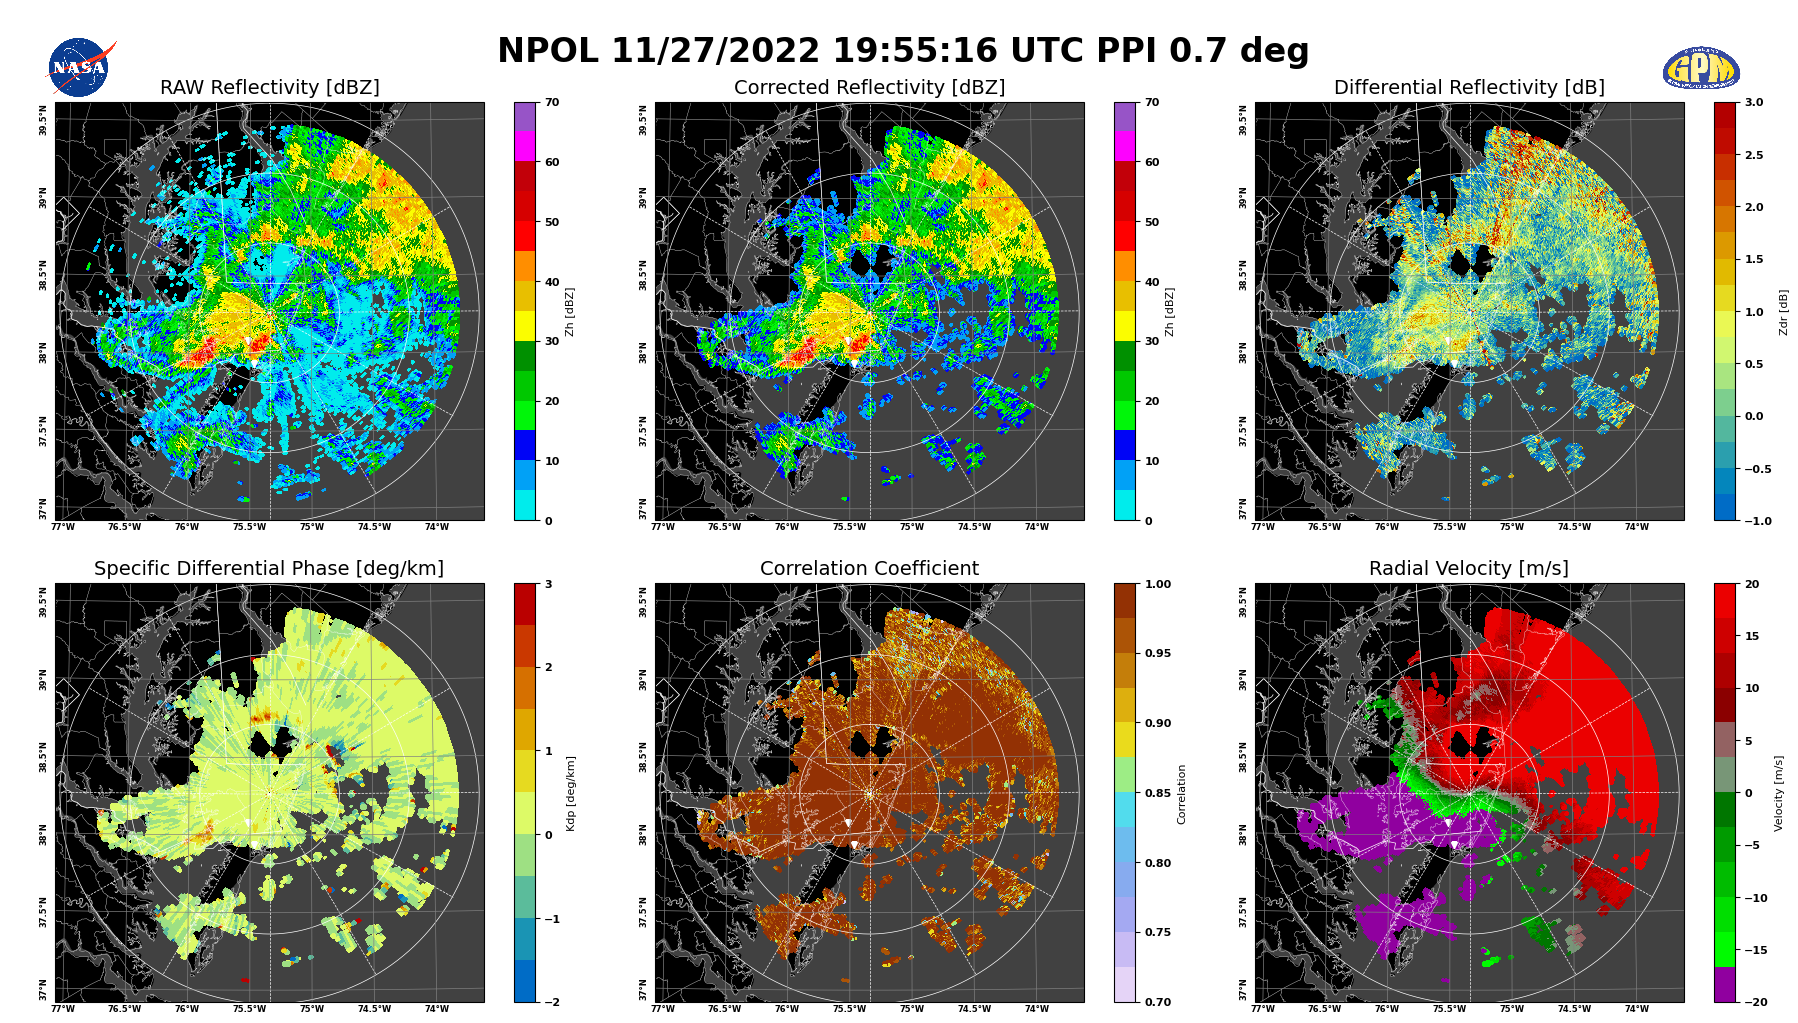

ploting time:   92.61578893661499


In [3]:
q = GVradar.QC(file, **kwargs)
qc_radar = q.run_dpqc()

### QC is complete, now we can create Dual Pol products.

### Set DP product options

In [4]:
kwargs_product = {}

# Select if you want to output a cf file and what fields to write
kwargs_product.update({'output_cf': False, 'cf_dir': './cf/', 
                       'output_fields': ['DZ', 'CZ', 'VR', 'DR', 
                                         'KD', 'PH', 'RH', 'SD',
                                         'SQ', 'FH', 'RC', 'DM', 
                                         'NW', 'RP']})
# Select which products to produce.
# Calculate Dolan et al. HID fields
kwargs_product.update({'do_HID_summer': True,
                      'do_HID_winter': False})

# Do not use temperature in HID calculation
kwargs_product.update({'no_temp': False})

# Calculate Bringi KDP field
kwargs_product.update({'get_Bringi_kdp': True})

# Calculate Ice and liquid Mass Calculation
kwargs_product.update({'do_mass': True})

# Calculate CSU Blended Rainfall Algorithm
kwargs_product.update({'do_RC': True})

# Calculate Pol ZR rain rate
kwargs_product.update({'do_RP': True})

# Remove bins classified as ice from rain rates and DSD fields
kwargs_product.update({'de_ice': False})

# Calculate DM and NW from Tokay et al.
kwargs_product.update({'do_tokay_DSD': True})

# Set which DM equations will be applied.
kwargs_product.update({'dsd_loc': 'wff'})

# Mask bins beyond 150 km.
kwargs_product.update({'do_150_mask': False})

# Get calibration numbers from cal txt files.
kwargs_product.update({'get_cal_file': False, 'cal_dir': '/gvraid/trmmgv/caltxt_files/'})

# Apply and set calibration numbers.
kwargs_product.update({'apply_cal': False, 'ref_cal': 0.0, 'zdr_cal': 0.0})

# Select plot limits, plot type (single or multiplot), and fields to plot.
kwargs_product.update({'plot_raw_images': False, 'plot_images': True, 'max_range': 150, 'max_height': 15, 
               'sweeps_to_plot': [0], 'plot_single': False, 'plot_multi': True,
               'fields_to_plot': ['CZ', 'FH', 'RC', 'RP',
                                  'DM', 'NW', 'MI', 'MW']})

# Select fast plots (No Geography), mask values outside colorbar range,
# Add NASA and GPM logos to plot.  Set png to True to save plots in plot_dir.
kwargs_product.update({'plot_fast': False, 'mask_outside': True, 'add_logos': True,
               'png': False, 'plot_dir': './plots/'})

# A Sounding is needed for DP products, sounding type can be; uwy, ruc, ruc_archive)
kwargs_product.update({'use_sounding': True, 'sounding_type': 'ruc_archive', 'png': False,
                       'sounding_dir': './soundings/'})

### Now we can run DP products


DP products parameters:    

{'site': 'NPOL', 'scan_type': 'PPI', 'month': '11', 'day': '27', 'year': '2022', 'hh': '19', 'mm': '55', 'ss': '16', 'ref_field_name': 'CZ', 'phi_field_name': 'PH', 'zdr_field_name': 'DR', 'radar_band': 'S', 'output_cf': False, 'cf_dir': './cf/', 'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'SD', 'SQ', 'FH', 'RC', 'DM', 'NW', 'RP'], 'do_HID_summer': True, 'do_HID_winter': False, 'no_temp': False, 'get_Bringi_kdp': True, 'do_mass': True, 'do_RC': True, 'do_RP': True, 'de_ice': False, 'do_tokay_DSD': True, 'dsd_loc': 'wff', 'do_150_mask': False, 'get_cal_file': False, 'cal_dir': '/gvraid/trmmgv/caltxt_files/', 'apply_cal': False, 'ref_cal': 0.0, 'zdr_cal': 0.0, 'plot_raw_images': False, 'plot_images': True, 'max_range': 150, 'max_height': 15, 'sweeps_to_plot': [0], 'plot_single': False, 'plot_multi': True, 'fields_to_plot': ['CZ', 'FH', 'RC', 'RP', 'DM', 'NW', 'MI', 'MW'], 'plot_fast': False, 'mask_outside': True, 'add_logos': True, 'png': Fal

/Users/jpippitt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:6957: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


    Calculating blended rainfall field...
    Calculating PolZR rain rate with computed NW


/Users/jpippitt/GPM-GV/GVradar/gvradar/dp_products.py:478: RuntimeWarning: overflow encountered in power
  x1 = 6.0 * (3.67 + mu)**(4+mu)
/Users/jpippitt/GPM-GV/GVradar/gvradar/dp_products.py:478: RuntimeWarning: invalid value encountered in power
  x1 = 6.0 * (3.67 + mu)**(4+mu)
/Users/jpippitt/GPM-GV/GVradar/gvradar/dp_products.py:478: RuntimeWarning: overflow encountered in multiply
  x1 = 6.0 * (3.67 + mu)**(4+mu)
/Users/jpippitt/GPM-GV/GVradar/gvradar/dp_products.py:479: RuntimeWarning: overflow encountered in multiply
  x2 = (3.67**4) * gamma(mu+4)
/Users/jpippitt/GPM-GV/GVradar/gvradar/dp_products.py:480: RuntimeWarning: invalid value encountered in divide
  f_mu = x1/x2
/Users/jpippitt/GPM-GV/GVradar/gvradar/dp_products.py:483: RuntimeWarning: overflow encountered in multiply
  x3 = f_mu * gamma(7+mu)
/Users/jpippitt/GPM-GV/GVradar/gvradar/dp_products.py:484: RuntimeWarning: overflow encountered in power
  x4 = (3.67+mu)**(7+mu)
/Users/jpippitt/GPM-GV/GVradar/gvradar/dp_product

DP products complete.

Plotting PPI images...


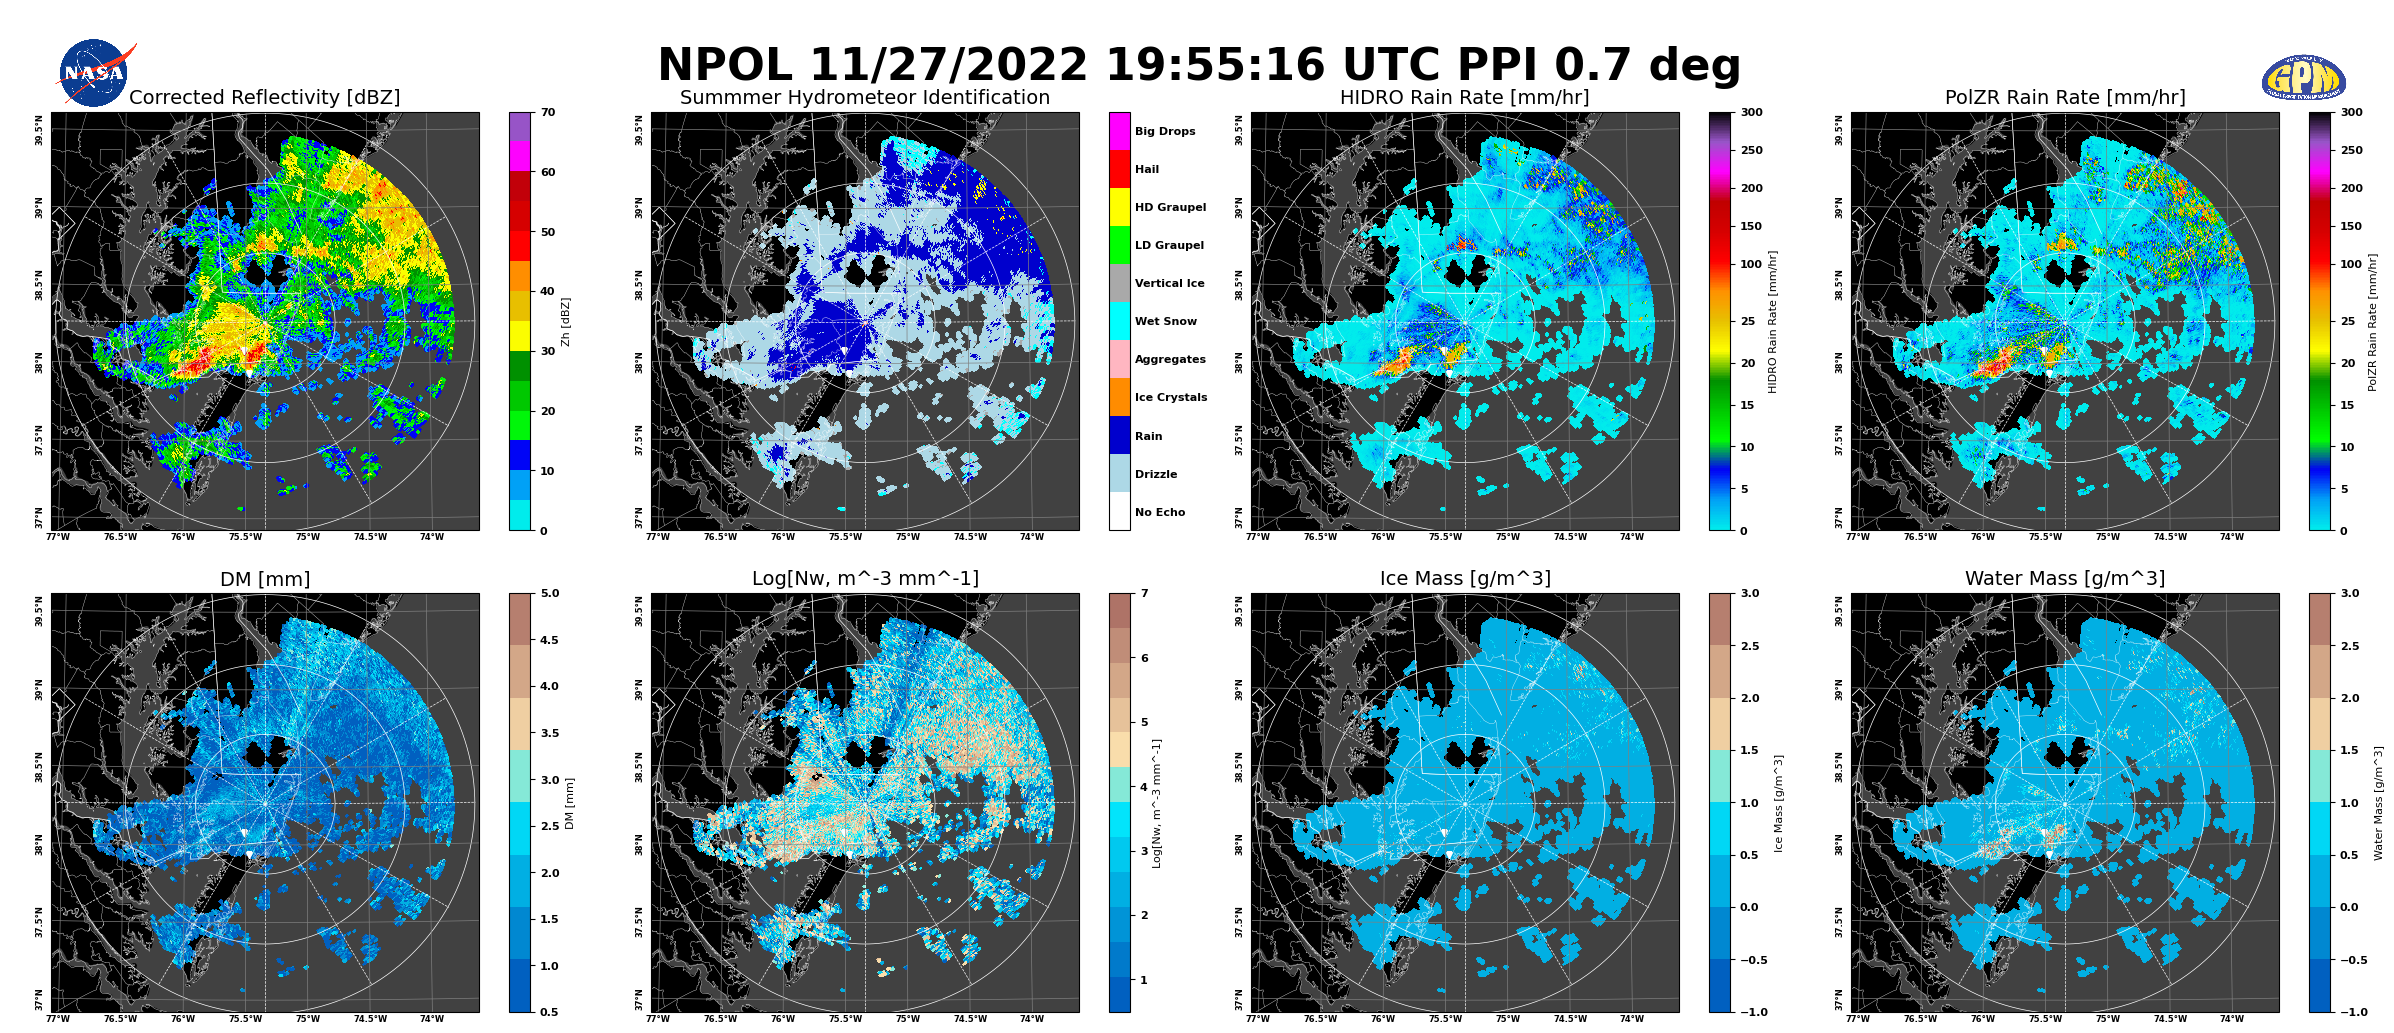

ploting time:   12.819607019424438


In [5]:
# First grab sounding file
response = requests.get('https://pmm-gv.gsfc.nasa.gov/pub/NPOL/Newark/2022/1127/ppi/NPOL_2022_1127_20UTC.txt')
open("./NPOL_2022_1127_20UTC.txt", "wb").write(response.content)

sounding_folder = './soundings/2022/1127/NPOL/'
os.makedirs(sounding_folder, exist_ok=True)
shutil.copy('./NPOL_2022_1127_20UTC.txt',sounding_folder)

# Run DP_products
d = GVradar.DP_products('QC_radar', qc_radar, **kwargs_product)
d.run_DP_products()

# Clean up sample files
shutil.rmtree(sounding_folder)
os.remove(file)
os.remove("./NPOL_2022_1127_20UTC.txt")